In [2]:
import pandas as pd
import statsmodels.api as sm
file=pd.read_csv("C:/Users/deepika sakthivel/Downloads/Social_Network_Ads.csv")
df=pd.DataFrame(file)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.shape

(400, 5)

In [5]:
x=df.drop(['Purchased'],axis=1)
y=df["Purchased"]

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["Gender"]=le.fit_transform(df['Gender'])

In [7]:
x=df.drop(['Purchased'],axis=1)
y=df["Purchased"]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [13]:
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(x_train,y_train)

BernoulliNB()

In [14]:
y_pred=classifier.predict(x_test)
classifier.predict_proba(x_test)

array([[0.78730608, 0.21269392],
       [0.48446879, 0.51553121],
       [0.78730608, 0.21269392],
       [0.75017936, 0.24982064],
       [0.89408165, 0.10591835],
       [0.91801475, 0.08198525],
       [0.89408165, 0.10591835],
       [0.27690582, 0.72309418],
       [0.89408165, 0.10591835],
       [0.53669617, 0.46330383],
       [0.91232204, 0.08767796],
       [0.90082993, 0.09917007],
       [0.55487821, 0.44512179],
       [0.27690582, 0.72309418],
       [0.78730608, 0.21269392],
       [0.75017936, 0.24982064],
       [0.29183049, 0.70816951],
       [0.78730608, 0.21269392],
       [0.23702568, 0.76297432],
       [0.91801475, 0.08198525],
       [0.89408165, 0.10591835],
       [0.25054565, 0.74945435],
       [0.48446879, 0.51553121],
       [0.29183049, 0.70816951],
       [0.89408165, 0.10591835],
       [0.25054565, 0.74945435],
       [0.73618191, 0.26381809],
       [0.78730608, 0.21269392],
       [0.48446879, 0.51553121],
       [0.73618191, 0.26381809],
       [0.

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[49,  9],
       [ 7, 15]], dtype=int64)

In [17]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.88      0.84      0.86        58\n           1       0.62      0.68      0.65        22\n\n    accuracy                           0.80        80\n   macro avg       0.75      0.76      0.76        80\nweighted avg       0.81      0.80      0.80        80\n'

In [22]:
from sklearn.metrics import roc_curve

In [23]:
from sklearn.metrics import roc_auc_score

In [24]:
y_proba=classifier.predict_proba(x_test)
y_predicted=y_proba[:,1]
print(y_predicted)

[0.21269392 0.51553121 0.21269392 0.24982064 0.10591835 0.08198525
 0.10591835 0.72309418 0.10591835 0.46330383 0.08767796 0.09917007
 0.44512179 0.72309418 0.21269392 0.24982064 0.70816951 0.21269392
 0.76297432 0.08198525 0.10591835 0.74945435 0.51553121 0.70816951
 0.10591835 0.74945435 0.26381809 0.21269392 0.51553121 0.26381809
 0.22523572 0.72309418 0.44512179 0.46330383 0.08198525 0.08198525
 0.22523572 0.10591835 0.10591835 0.51553121 0.21269392 0.46330383
 0.26381809 0.08198525 0.74945435 0.10591835 0.74945435 0.74945435
 0.08198525 0.72309418 0.74945435 0.10591835 0.10591835 0.22523572
 0.76297432 0.44512179 0.24982064 0.26381809 0.44512179 0.08767796
 0.08767796 0.44512179 0.21269392 0.70816951 0.10591835 0.70816951
 0.24982064 0.08198525 0.46330383 0.74945435 0.24982064 0.24982064
 0.10591835 0.46330383 0.21269392 0.22523572 0.74945435 0.51553121
 0.49719832 0.76297432]


In [25]:
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)

In [26]:
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under the curve for first moel",roc_auc)

Area under the curve for first moel 0.89576802507837


Text(0, 0.5, 'True Positive Rate(Sensitivity)')

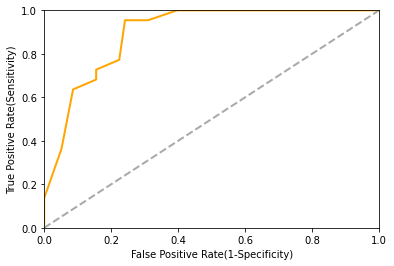

In [27]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='orange',lw=2,label='ROC curve(area under curve=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')